# Iris - Classification

In the dataset we have the info for three flowers (Iris-setosa,Iris-Versicolor,Iris-virginica) about their SepalLength(in cm),SepalWidth(in cm),PetalLength(in cm),PetalWidth(in cm).


In [169]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Above are the modules we are going to use for our MultiClass Classification problem.
- pandas --> For data analysis
- seaborn --> For data visualization
- sklearn --> For Machine Learning models

## Getting the data

Let's read the csv file into a Pandas DataFrame using read_csv() method .

In [170]:
raw_df = pd.read_csv('Iris.csv')

In [171]:
raw_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Let's have a basic information of the features and targets in our dataset. This can be done by using info() method .

In [172]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


It seems we have a total of 6 columns and 150 instances and there is no data missing . The columns SepalLength,SepalWidth,PetalLength,Petalwidth are of float datatype and Species is of object datatye basically a string (by observation).

Let's have description for the numerical columns in our dataset . This can be done using describe() method.

In [173]:
raw_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It's seems that the values are in a range of 1-10 in our features (exception Id since it is not used).

## Splitting the data

Let's split the data into parts train and test to train our model using train set and test it on test set so our model will be evaluated on the data which it had never seen before.Here we use train_test_split() method.

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
train_df, test_df = train_test_split(raw_df, random_state = 42, test_size = 0.4)

In [176]:
train_df.shape,test_df.shape

((90, 6), (60, 6))

By the above we have splitted our raw_df into two parts of ratio 0.4 which seems we have 90 instances in train_df and 60 instances in test_df .

## Getting insights from the data

So now we visualize the data from train_df to collect some insights from it.Let's have a look at the variations of SepalLength,SepalWidth,PetalLength,PetalWidth of the flowers with eachother in different categories. We can have this visualization using scatterplot from seaborn(which is imported as sns).

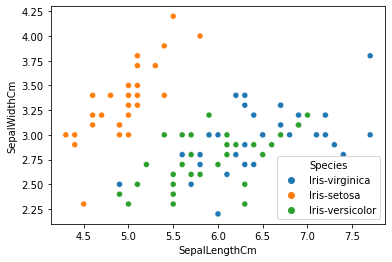

In [177]:
sns.scatterplot(x = train_df.SepalLengthCm, y = train_df.SepalWidthCm, hue = train_df.Species);

Above scatterplot is in between SepalLength and SepalWidth.

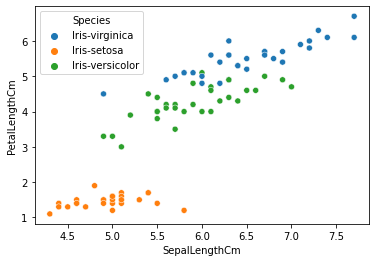

In [178]:
sns.scatterplot(x = train_df.SepalLengthCm, y = train_df.PetalLengthCm, hue = train_df.Species);

Above scatterplot is in between SepalLength and PetalLength.

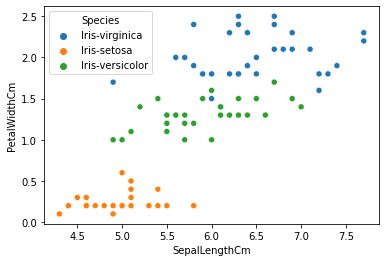

In [179]:
sns.scatterplot(x = train_df.SepalLengthCm, y = train_df.PetalWidthCm, hue = train_df.Species);

Above scatterplot is in between SepalLength and PetalWidth.

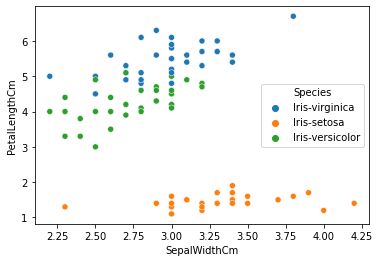

In [180]:
sns.scatterplot(x = train_df.SepalWidthCm, y = train_df.PetalLengthCm, hue = train_df.Species);

Above scatterplot is in between SepalWidth and PetalLength.

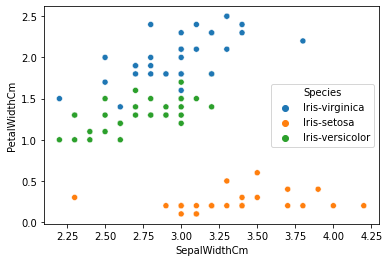

In [181]:
sns.scatterplot(x = train_df.SepalWidthCm, y = train_df.PetalWidthCm, hue = train_df.Species);

Above scatterplot is in between SepalWidth and PetalWidth.

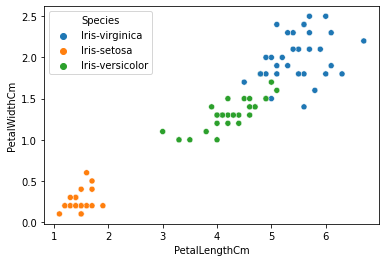

In [182]:
sns.scatterplot(x = train_df.PetalLengthCm, y = train_df.PetalWidthCm, hue = train_df.Species);

Above scatterplot is in between PetalLength and PetalWidth.

## Getting inputs and targets

In [183]:
raw_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In the train_df and test_df SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm are our inputs for the model and Species is the target column we have to predict .

In [184]:
input_cols = raw_df.columns[1:-1]
input_cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [185]:
target_col = raw_df.columns[-1]
target_col

'Species'

In [186]:
train_inputs = train_df[input_cols].copy()
train_inputs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [187]:
train_targets = train_df[target_col].copy()
train_targets

123     Iris-virginica
24         Iris-setosa
25         Iris-setosa
23         Iris-setosa
94     Iris-versicolor
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 90, dtype: object

In [188]:
test_inputs = test_df[input_cols]
test_inputs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [189]:
test_targets = test_df[target_col].copy()
test_targets

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
146     Iris-virginica
51     Iris-versicolor
27         Iris-setosa
4          Iris-setosa
32         Iris-setosa
142     Iris-virginica
85     Iris-versicolor
86     Iris-versicolor
16         

We have created copies for train_inputs and test_inputs since we do data processing on inputs to make them ready for training the model and this processing shouldn't affect our original train_df and test_df.

## Data Preprocessing

In [190]:
raw_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Thus there are no missing values in our entire dataset(inculdes train_df and test_df) . So there is no need of Imputation.

Let's have a look at the ranges of inputs columns in our train_inputs.

In [191]:
train_inputs.describe().loc[['max','min']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
max,7.7,4.2,6.7,2.5
min,4.3,2.2,1.1,0.1


These values are in a range of 1-10 and there is no much variation of the ranges of values between input_cols. So there is no a compulsory need of Scaling .

Let's have a look at the datatypes of features present in our input_cols.

In [192]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 123 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  90 non-null     float64
 1   SepalWidthCm   90 non-null     float64
 2   PetalLengthCm  90 non-null     float64
 3   PetalWidthCm   90 non-null     float64
dtypes: float64(4)
memory usage: 3.5 KB


All the features in our inputs(which include train_inputs and test_inputs) are of float type . So there is no need of Encoding(as there are no categorical columns).

## Training the Model

First we use KNeighborsClassifier as our model and train with the train dataset and we will also have a look at it's accuracy on test dataset.
 

In [193]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

Let's train our model by using fit() method.

In [194]:
knn.fit(train_inputs,train_targets)

KNeighborsClassifier(n_jobs=-1)

Let's predict targets for test_inputs using predict() method.

In [195]:
test_preds = knn.predict(test_inputs)
test_preds

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',

Let's look at the accuracy of our model on test dataset.

In [196]:
knn_accuracy = knn.score(test_inputs,test_targets)
knn_accuracy

0.9833333333333333

So our KNeighborsClassifier has 98% accuracy on test_inputs that the data which it hadn't seen before.

Let's train another model which is DecissionTree

In [197]:
dt = DecisionTreeClassifier(random_state=42)

Let's train the model on training dataset using fit() method.

In [198]:
dt.fit(train_inputs,train_targets)

DecisionTreeClassifier(random_state=42)

Let's predict the targets for test_inputs using predict() method.

In [199]:
test_preds = dt.predict(test_inputs)
test_preds

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',


Let's look at the accuracy of our model on test dataset.

In [200]:
dt_accuracy = dt.score(test_inputs,test_targets)
dt_accuracy

0.9666666666666667

So our DecissionTreeClassifier has 96% accuracy on test_inputs that the data which it hadn't seen before.

Let's compare the accuracy of our models

In [201]:
knn_accuracy,dt_accuracy

(0.9833333333333333, 0.9666666666666667)

Conclusion : Thus our knn(KNeighborsClassifier) has more accuracy than dt(DecissionTreeClassifier).